In [21]:
# Importing the required libraries for computation
from sklearn.metrics import roc_auc_score
import pandas
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Importing the Iris flower dataset
iris = pandas.read_csv("iris.csv")
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.0,3.2,4.7,1.4,Iris-versicolor
1,6.4,3.2,4.5,1.5,Iris-versicolor
2,6.9,3.1,4.9,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
4,6.5,2.8,4.6,1.5,Iris-versicolor


In [23]:
# Shuffling and randomizing the dataset for smoothening the bias aspect
shuffled_rows = np.random.permutation(iris.index)
iris = iris.loc[shuffled_rows,:]
iris.shape[0]

100

In [24]:
# Viewing the modified dataset to fix the columns required for analysis
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
18,6.2,2.2,4.5,1.5,Iris-versicolor
3,5.5,2.3,4.0,1.3,Iris-versicolor
92,5.8,2.7,5.1,1.9,Iris-virginica
63,5.7,2.5,5.0,2.0,Iris-virginica
2,6.9,3.1,4.9,1.5,Iris-versicolor


In [25]:
# It is evident from the dataset that there are 4 feature attributes related to the Iris flower, along with a unit bias variable
# Fixing the feature columns and the target
iris["ones"] = np.ones(iris.shape[0]) #Bias variable
X = iris[['ones', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = (iris.species == 'Iris-versicolor').values.astype(int)

#Since there are only 100 rows in the dataset, let's take 70 rows for training the neural network and 30 rows for predictions
# Training set
X_train = X[:70]
y_train = y[:70]

# Test Set
X_test = X[-30:]
y_test = y[-30:]

In [26]:
# In this 2-layered neural network approach, there is an input layer with 5 neurons (4 features and 1 bias variable)
# and a hidden layer with 5 activation weights (including the bias term transfer)

# Defining the sigmoid function for calculating the activation weights
def sigmoid_activation(x, theta):
    x = np.asarray(x)
    theta = np.asarray(theta)
    return 1 / (1 + np.exp(-np.dot(theta.T, x)))

In [28]:
# Defining the neural network model class - KarthikNeuralNetwork, for starting the computational process
# The model comprises the following:
# 1. Cost (Loss) Function
# 2. Feedforward Function
# 3. Learning Function with Backpropagation functionality
class KarthikNeuralNetwork:
    def __init__(self, learning_rate=0.5, maxepochs=1e4, convergence_thres=1e-5, hidden_layer=4):
        self.learning_rate = learning_rate
        self.maxepochs = int(maxepochs)
        self.convergence_thres = 1e-5
        self.hidden_layer = int(hidden_layer)
        
    def _multiplecost(self, X, y):
        # feed through network
        l1, l2 = self._feedforward(X) 
        # compute error
        inner = y * np.log(l2) + (1-y) * np.log(1-l2)
        # negative of average error
        return -np.mean(inner)
    
    def _feedforward(self, X):
        # feedforward to the first layer
        l1 = sigmoid_activation(X.T, self.theta0).T
        # add a column of ones for bias term
        l1 = np.column_stack([np.ones(l1.shape[0]), l1])
        # activation units are then fed as inputs to the output layer
        l2 = sigmoid_activation(l1.T, self.theta1)
        return l1, l2
    
    def predict(self, X):
        _, y = self._feedforward(X)
        return y
    
    def learn(self, X, y):
        nobs, ncols = X.shape
        self.theta0 = np.random.normal(0,0.01,size=(ncols,self.hidden_layer))
        self.theta1 = np.random.normal(0,0.01,size=(self.hidden_layer+1,1))
        
        self.costs = []
        cost = self._multiplecost(X, y)
        self.costs.append(cost)
        costprev = cost + self.convergence_thres+1  # set an inital costprev to past while loop
        counter = 0  # intialize a counter

        # Loop through until convergence
        for counter in range(self.maxepochs):
            # feedforward through network
            l1, l2 = self._feedforward(X)

            # Start Backpropagation
            # Compute gradients
            l2_delta = (y-l2) * l2 * (1-l2)
            l1_delta = l2_delta.T.dot(self.theta1.T) * l1 * (1-l1)

            # Update parameters by averaging gradients and multiplying by the learning rate
            self.theta1 += l1.T.dot(l2_delta.T) / nobs * self.learning_rate
            self.theta0 += X.T.dot(l1_delta)[:,1:] / nobs * self.learning_rate
            
            # Store costs and check for convergence
            counter += 1  # Count
            costprev = cost  # Store prev cost
            cost = self._multiplecost(X, y)  # get next cost
            self.costs.append(cost)
            if np.abs(costprev-cost) < self.convergence_thres and counter > 500:
                break


In [29]:
# Fixing the machine parameters for the KarthikNeuralNetwork model
# Setting a learning rate
learning_rate = 0.5
# Maximum number of iterations for gradient descent
maxepochs = 10000       
# Cost convergence threshold, ie. (prevcost - cost) > convergence_thres
convergence_thres = 0.00001  
# Number of hidden units
hidden_units = 4

In [36]:
# Initializing the model
model = KarthikNeuralNetwork(learning_rate=learning_rate, maxepochs=maxepochs,
              convergence_thres=convergence_thres, hidden_layer=hidden_units)

# Training the model
model.learn(X_train, y_train)
predictions = model.predict(X_test)[0]
print("The predictions are: \n", predictions)
print("\n")
auc = roc_auc_score(y_test, predictions).astype('float')
print("The ROC-AUC score for the given predictions is: ", auc)

The predictions are: 
 [0.9907677  0.99566852 0.03969568 0.82590994 0.97011551 0.38916308
 0.99695393 0.10549713 0.05039555 0.41101353 0.03765598 0.93168051
 0.1379326  0.99734466 0.9901962  0.99759661 0.99784938 0.97052717
 0.06536403 0.99929482 0.01010244 0.05097158 0.03382346 0.10334811
 0.0189888  0.00916383 0.28909437 0.04348117 0.06560893 0.98584159]


The ROC-AUC score for the given predictions is:  1.0


In [38]:
# Checking the validity of the predictions
if auc >= 0.7 and auc <= 0.9:
    print("This is a good test")
elif auc == 1.0:
    print("This is the perfect test")
else:
    print("Waste of time")

This is the perfect test


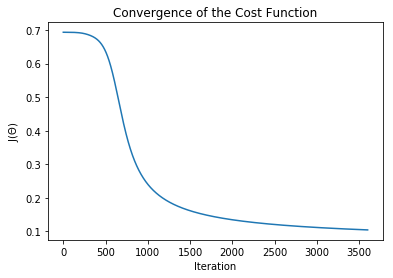

In [32]:
# Plotting the convergence pattern of the cost function (loss function)
plt.plot(model.costs)
plt.title("Convergence of the Cost Function")
plt.ylabel("J($\Theta$)")
plt.xlabel("Iteration")
plt.show()